## Working with a csv file in python

In [976]:
import os
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean

In [966]:
# Reading one CTD file into dataframe (excel user's favorite data structure) 
filename = "share/csv/CTD_z_profile_station_9.csv"
ctdcast = pd.read_csv(filename)
ctdcast

,depth (m),temp. (deg C),sal. (PSU),density (kg/m^3),pH,fluo. (mg/m^3),oxygen (mg/L)
0,2.0,21.106,34.365,1024.0,8.2086,0.24080,6.7461
1,2.1,21.106,34.365,1024.0,8.2070,0.24337,6.7385
2,2.2,21.106,34.365,1024.0,8.2067,0.24046,6.7358
3,2.3,21.105,34.365,1024.0,8.2080,0.24125,6.7389
4,2.4,21.104,34.365,1024.0,8.2070,0.24316,6.7442
...,...,...,...,...,...,...,...
1156,117.6,13.237,35.345,1027.1,8.0126,0.07400,6.2213
1157,117.7,NaN,NaN,NaN,NaN,NaN,NaN
1158,117.8,NaN,NaN,NaN,NaN,NaN,NaN
1159,117.9,NaN,NaN,NaN,NaN,NaN,NaN


In [967]:
ctdcast.keys()

Index(['depth (m)', ' temp. (deg C)', ' sal. (PSU)', ' density (kg/m^3)',
       ' pH', ' fluo. (mg/m^3)', ' oxygen (mg/L)'],
      dtype='object')

In [968]:
# it's easier to work with depth as an index
ctdcast.set_index('depth (m)')

,temp. (deg C),sal. (PSU),density (kg/m^3),pH,fluo. (mg/m^3),oxygen (mg/L)
depth (m),,,,,,
2.0,21.106,34.365,1024.0,8.2086,0.24080,6.7461
2.1,21.106,34.365,1024.0,8.2070,0.24337,6.7385
2.2,21.106,34.365,1024.0,8.2067,0.24046,6.7358
2.3,21.105,34.365,1024.0,8.2080,0.24125,6.7389
2.4,21.104,34.365,1024.0,8.2070,0.24316,6.7442
...,...,...,...,...,...,...
117.6,13.237,35.345,1027.1,8.0126,0.07400,6.2213
117.7,NaN,NaN,NaN,NaN,NaN,NaN
117.8,NaN,NaN,NaN,NaN,NaN,NaN


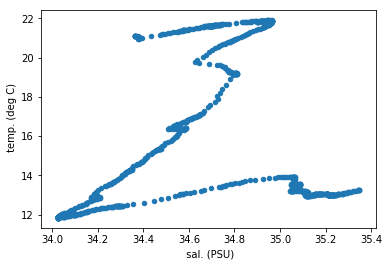

In [969]:
# dataframes make plotting easy:
# ctdcast.plot.scatter(' sal. (PSU)',' temp. (deg C)')
ctdcast.plot.scatter(' sal. (PSU)',' temp. (deg C)')

In [634]:
# You can also convert dataframes to xarray DataArray (Cesar's favorite data structure)
ctdcast = ctdcast.to_xarray()

In [635]:
ctdcast

<xarray.Dataset>
Dimensions:            (index: 1161)
Coordinates:
  * index              (index) int64 0 1 2 3 4 5 ... 1156 1157 1158 1159 1160
Data variables:
    depth (m)          (index) float64 2.0 2.1 2.2 2.3 ... 117.8 117.9 118.0
     temp. (deg C)     (index) float64 21.11 21.11 21.11 21.11 ... nan nan nan
     sal. (PSU)        (index) float64 34.37 34.37 34.37 34.37 ... nan nan nan
     density (kg/m^3)  (index) float64 1.024e+03 1.024e+03 1.024e+03 ... nan nan
     pH                (index) float64 8.209 8.207 8.207 8.208 ... nan nan nan
     fluo. (mg/m^3)    (index) float64 0.2408 0.2434 0.2405 ... nan nan nan
     oxygen (mg/L)     (index) float64 6.746 6.739 6.736 6.739 ... nan nan nan

In [636]:
ctdcast.keys()

KeysView(<xarray.Dataset>
Dimensions:            (index: 1161)
Coordinates:
  * index              (index) int64 0 1 2 3 4 5 ... 1156 1157 1158 1159 1160
Data variables:
    depth (m)          (index) float64 2.0 2.1 2.2 2.3 ... 117.8 117.9 118.0
     temp. (deg C)     (index) float64 21.11 21.11 21.11 21.11 ... nan nan nan
     sal. (PSU)        (index) float64 34.37 34.37 34.37 34.37 ... nan nan nan
     density (kg/m^3)  (index) float64 1.024e+03 1.024e+03 1.024e+03 ... nan nan
     pH                (index) float64 8.209 8.207 8.207 8.208 ... nan nan nan
     fluo. (mg/m^3)    (index) float64 0.2408 0.2434 0.2405 ... nan nan nan
     oxygen (mg/L)     (index) float64 6.746 6.739 6.736 6.739 ... nan nan nan)

In [637]:
# ouch, these keys with spaces and units are really annoying.
# let's change them into something a little bit more workable
keys = ctdcast.keys()
rename_dict = {'depth (m)': 'depth',' temp. (deg C)': 'temperature',
               ' sal. (PSU)': 'salinity', ' density (kg/m^3)': 'density',
               ' fluo. (mg/m^3)': 'fluorometry',' oxygen (mg/L)':'oxygen'}

ctdcast = ctdcast.rename(rename_dict)
ctdcast

<xarray.Dataset>
Dimensions:      (index: 1161)
Coordinates:
  * index        (index) int64 0 1 2 3 4 5 6 ... 1155 1156 1157 1158 1159 1160
Data variables:
    depth        (index) float64 2.0 2.1 2.2 2.3 2.4 ... 117.7 117.8 117.9 118.0
    temperature  (index) float64 21.11 21.11 21.11 21.11 ... nan nan nan nan
    salinity     (index) float64 34.37 34.37 34.37 34.37 ... nan nan nan nan
    density      (index) float64 1.024e+03 1.024e+03 1.024e+03 ... nan nan nan
     pH          (index) float64 8.209 8.207 8.207 8.208 ... nan nan nan nan
    fluorometry  (index) float64 0.2408 0.2434 0.2405 0.2412 ... nan nan nan nan
    oxygen       (index) float64 6.746 6.739 6.736 6.739 ... nan nan nan nan

In [638]:
# Of course we want to preserve the units. 
# We can add those as metadata
ctdcast.depth.attrs['units'] = 'm'
ctdcast.temperature.attrs['units'] = 'degree C'
ctdcast.salinity.attrs['units'] = 'psu'
ctdcast.density.attrs['units'] = 'kg/m3'
ctdcast.fluorometry.attrs['units'] = 'mg/m3'
ctdcast.oxygen.attrs['units'] = 'mg/L'

(118.0, 0)

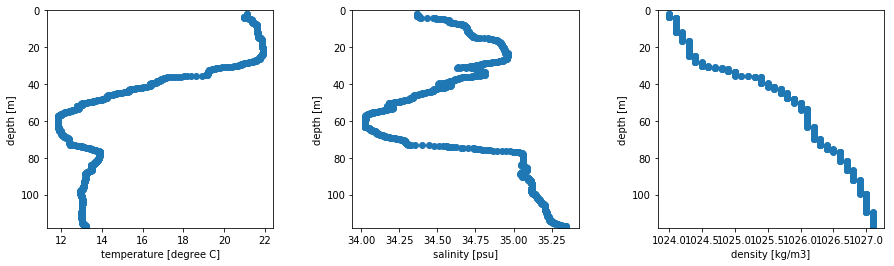

In [639]:
# you can also plot things easily
# temperature profile
ylim = (ctdcast.depth.values.max(),0)

fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(131)
ctdcast.plot.scatter('temperature','depth')
plt.ylim(*ylim)

plt.subplots_adjust(wspace=.35)

ax2 = fig.add_subplot(132)
ctdcast.plot.scatter('salinity','depth')
plt.ylim(*ylim)

ax3 = fig.add_subplot(133)
ctdcast.plot.scatter('density','depth')
plt.ylim(*ylim)

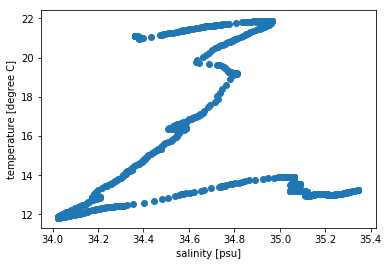

In [640]:
# TS diagram
ctdcast.plot.scatter('salinity','temperature')
# ctdcast.plot.scatter(' sal. (PSU)',' temp. (deg C)')

In [641]:
# Hm, the density profile looks suspicious...
# We are not sure what the 2018 Ocean Expedition cohort did.
# Let's calculate density ourselves both with EOS (the 1980's way) and TEOS (the modern way)
import gsw
import seawater as sw

# calculate density two different ways (use depth for pressure)
da_gsw = xr.apply_ufunc(gsw.density.rho, ctdcast['salinity'],ctdcast['temperature'], ctdcast['depth'], 
                    output_dtypes=[ctdcast['salinity'].dtype])

da_sw = xr.apply_ufunc(sw.dens, ctdcast['salinity'],ctdcast['temperature'],ctdcast['depth'], 
                    output_dtypes=[ctdcast['salinity'].dtype]) 

Text(0, 0.5, 'Depth [m]')

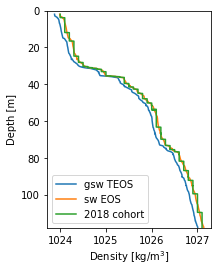

In [642]:
# now compare with the density provided with the data
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(131)
plt.plot(da_gsw,ctdcast.depth,label='gsw TEOS')
plt.plot(da_sw,ctdcast.depth,label='sw EOS')

plt.plot(ctdcast.density,ctdcast.depth,label='2018 cohort')
plt.legend(loc=3)
plt.ylim(*ylim)

plt.xlabel(r'Density [kg/m$^3$]')
plt.ylabel(r'Depth [m]')

In [643]:
# It looks like they used EOS. They also
# did something weird (and wrong) with the data.
# Note the steppy green line...this is likely due
# to a faulty bin average. Ouch!

# Pairing stations

In [971]:
# first cast coordinates
datapath = "share/csv/"

coords = pd.read_csv(os.path.join(datapath,"CTD_cast_coords.csv"))
coords

,profile #,Lat(deg),Lon(deg)
0,3,41.240,-72.054
1,4,41.232,-71.859
2,5,41.144,-71.655
3,7,40.602,-71.006
4,8,40.390,-71.001
5,9,40.201,-71.001


In [972]:
coastline = pd.read_csv(os.path.join(datapath,"coastline.csv"))

coastline

,Lat(deg),Lon(deg)
0,NaN,NaN
1,41.500,-72.085
2,41.499,-72.084
3,41.498,-72.083
4,41.497,-72.083
...,...,...
53517,41.414,-71.509
53518,41.414,-71.509
53519,41.414,-71.508
53520,41.415,-71.508


/Users/crocha/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/crocha/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/crocha/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


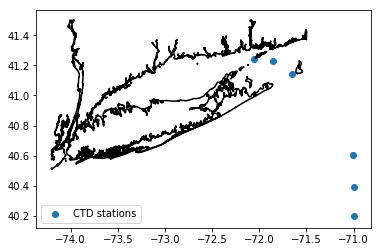

In [644]:
# first cast coordinates
datapath = "share/csv/"

coords = pd.read_csv(os.path.join(datapath,"CTD_cast_coords.csv"))
coastline = pd.read_csv(os.path.join(datapath,"coastline.csv"))

fig = plt.figure()
plt.plot(coastline['  Lon(deg)'],coastline['Lat(deg)'],color='k',label='')
plt.scatter(coords[' Lon(deg)'],coords[' Lat(deg)'],label='CTD stations')
plt.legend(loc=3)

In [825]:
# Read data and convert it into a DataArray
def read_ctdcast(cast):
    """Read ctdcast into DataArray, cast is the ctd station (int)"""
    
    datapath = "share/csv/"
    filename = os.path.join(datapath,'CTD_z_profile_station_'+str(cast)+'.csv')

    # read the ctd data into a DataArray
    ctdcast = pd.read_csv(filename)
    ctdcast = ctdcast.assign(pressure=ctdcast['depth (m)'].values) # use depth as pressure (this is an approx, but ok)
    ctdcast = ctdcast.set_index('depth (m)').to_xarray()
    
    # rename attributes
    rename_dict = {'depth (m)': 'depth',' temp. (deg C)': 'temperature',
                   ' sal. (PSU)': 'salinity', ' density (kg/m^3)': 'density',
                   ' fluo. (mg/m^3)': 'fluorometry',' oxygen (mg/L)':'oxygen'}

    ctdcast = ctdcast.rename(rename_dict)
  
    # recalculate density 
    density = xr.apply_ufunc(gsw.density.rho, ctdcast['salinity'],ctdcast['temperature'], ctdcast['depth'], 
                    output_dtypes=[ctdcast['salinity'].dtype])

        
    # add units as metadata
    ctdcast.depth.attrs['units'] = 'm'
    ctdcast.temperature.attrs['units'] = 'degree C'
    ctdcast.salinity.attrs['units'] = 'psu'
    ctdcast.fluorometry.attrs['units'] = 'mg/m3'
    ctdcast.oxygen.attrs['units'] = 'mg/L'
    
      
    # assign coordinates and position, and re-assign density
    coords = pd.read_csv(os.path.join(datapath,"CTD_cast_coords.csv"))
    f = np.where(coords['profile #'] == cast)[0][0]
    station, lat, lon = coords['profile #'][f], coords[' Lat(deg)'][f], coords[' Lon(deg)'][f]
    
    ctdcast = ctdcast.assign({'station': station,
                              'latitude': lat,'longitude':lon,
                              'density': density,
                             }
    )
    
    
    ctdcast.density.attrs['units'] = 'kg/m3'
    
    ctdcast = ctdcast.expand_dims('cast')
  
    ctdcast.latitude.attrs['units'] = 'degree'
    ctdcast.longitude.attrs['units'] = 'degree'
    
    return ctdcast

In [974]:
cast7 = read_ctdcast(7)
cast7

<xarray.Dataset>
Dimensions:      (cast: 1, depth: 601)
Coordinates:
  * depth        (depth) float64 2.0 2.1 2.2 2.3 2.4 ... 61.7 61.8 61.9 62.0
Dimensions without coordinates: cast
Data variables:
    temperature  (cast, depth) float64 19.05 19.05 19.06 ... 12.79 12.8 12.79
    salinity     (cast, depth) float64 33.23 33.23 33.23 ... 33.34 33.34 33.34
    density      (cast, depth) float64 1.024e+03 1.024e+03 ... 1.025e+03
     pH          (cast, depth) float64 8.151 8.154 8.152 ... 7.968 7.971 7.969
    fluorometry  (cast, depth) float64 0.6349 0.6254 0.6338 ... 0.3016 0.3039
    oxygen       (cast, depth) float64 7.41 7.406 7.405 ... 6.619 6.581 6.601
    pressure     (cast, depth) float64 2.0 2.1 2.2 2.3 ... 61.7 61.8 61.9 62.0
    station      (cast) int64 7
    latitude     (cast) float64 40.6
    longitude    (cast) float64 -71.01

In [977]:
cast7 = read_ctdcast(7)
cast8 = read_ctdcast(8)
cast9 = read_ctdcast(9)

In [978]:
# here's one way of doing it, but there's gotta be a better way...
# should add latitude, longitude and cast number
ctdsection = xr.concat([cast7,cast8,cast9],"cast")

In [979]:
# Add other dimensions
d = gsw.distance(ctdsection.longitude.values,ctdsection.latitude.values)/1e3 # km
dist = np.cumsum(np.hstack([0,d]))

ctdsection = ctdsection.assign_coords({'latitude': ctdsection.latitude,
                                      'longitude' : ctdsection.longitude,
                                      'station' : ctdsection.station,
                                      'distance' : xr.DataArray(dist, coords=[ctdsection.station], dims='cast'),
                                 }
                                )

ctdsection.distance.attrs['units'] = 'km'

In [980]:
ctdsection

<xarray.Dataset>
Dimensions:      (cast: 3, depth: 1161)
Coordinates:
  * depth        (depth) float64 2.0 2.1 2.2 2.3 2.4 ... 117.7 117.8 117.9 118.0
    station      (cast) int64 7 8 9
    latitude     (cast) float64 40.6 40.39 40.2
    longitude    (cast) float64 -71.01 -71.0 -71.0
  * cast         (cast) int64 7 8 9
    distance     (cast) float64 0.0 23.58 44.59
Data variables:
    temperature  (cast, depth) float64 19.05 19.05 19.06 19.06 ... nan nan nan
    salinity     (cast, depth) float64 33.23 33.23 33.23 33.23 ... nan nan nan
    density      (cast, depth) float64 1.024e+03 1.024e+03 1.024e+03 ... nan nan
     pH          (cast, depth) float64 8.151 8.154 8.152 8.152 ... nan nan nan
    fluorometry  (cast, depth) float64 0.6349 0.6254 0.6338 ... nan nan nan
    oxygen       (cast, depth) float64 7.41 7.406 7.405 7.401 ... nan nan nan
    pressure     (cast, depth) float64 2.0 2.1 2.2 2.3 ... 117.8 117.9 118.0

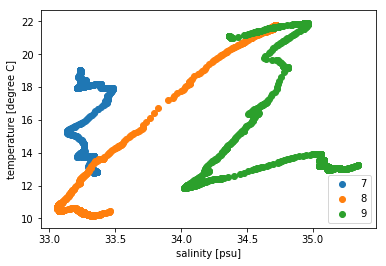

In [981]:
# T-S diagram color-coded by individual stations
stations = [7,8,9]

for i, st in zip(range(len(stations)),stations):
    ctdsection.isel(cast=i).plot.scatter('salinity','temperature',label=str(st))
plt.legend(loc=4)

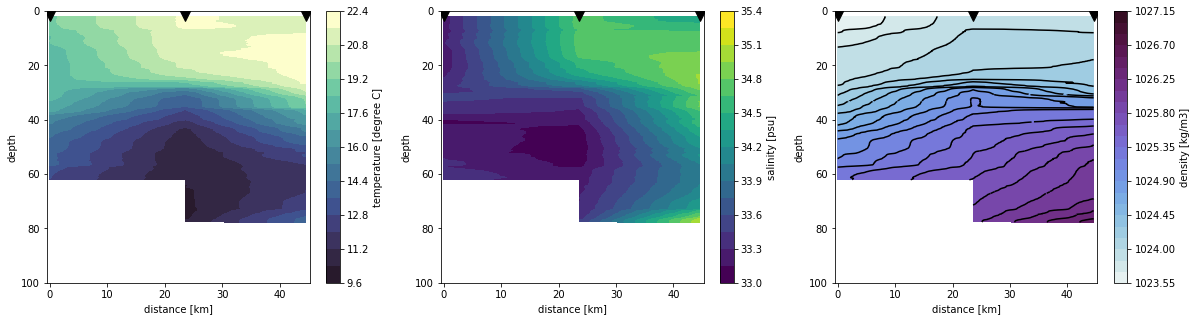

In [982]:
# sections
def beautifications(ax):
    ax.plot(ctdsection.distance,ctdsection.distance.size*[0],
             'kv',markersize=20)
    ax.set_ylim(100,0)
    ax.set_xlim(-.5,45.25)
    
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(131)
ctdsection.temperature.plot.contourf('distance','depth',levels=20,cmap=cmocean.cm.deep_r)
beautifications(ax)

ax = fig.add_subplot(132)
ctdsection.salinity.plot.contourf('distance','depth',levels=20)
beautifications(ax)

ax = fig.add_subplot(133)
ctdsection.density.plot.contourf('distance','depth',levels=30,cmap=cmocean.cm.dense)
ctdsection.density.plot.contour('distance','depth',levels=30,colors='k')

beautifications(ax)

In [983]:
# calculate geostrophic velocity relative to 60m

# first calculate the geopotential anomaly
dh = gsw.geo_strf_dyn_height(ctdsection['salinity'],ctdsection['temperature'], 
                    ctdsection['pressure'],p_ref=60,axis=1)

In [984]:
ctdsection['latitude']

<xarray.DataArray 'latitude' (cast: 3)>
array([40.602, 40.39 , 40.201])
Coordinates:
    station    (cast) int64 7 8 9
    latitude   (cast) float64 40.6 40.39 40.2
    longitude  (cast) float64 -71.01 -71.0 -71.0
  * cast       (cast) int64 7 8 9
    distance   (cast) float64 0.0 23.58 44.59
Attributes:
    units:    degree

In [986]:
# then calculate the geostrophic velocity (this gives a cross-section geo. velocity)
vgeo,longitude_v,latitude_v = gsw.geostrophic_velocity(dh.T,ctdsection['longitude'].values, 
                                                       ctdsection['latitude'].values)

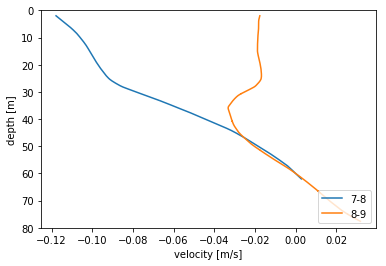

In [987]:
plt.plot(vgeo[:,0],ctdsection.depth,label='7-8')
plt.plot(vgeo[:,1],ctdsection.depth,label='8-9')
plt.xlabel('velocity [m/s]')
plt.ylabel('depth [m]')
plt.ylim(80,0)
plt.legend(loc=4)

In [988]:
# get adcp data
datapath = "share/csv/"

adcp_78 = pd.read_csv(os.path.join(datapath,"ADCP_ave_z_profile_S_7_8.csv"))
adcp_89 = pd.read_csv(os.path.join(datapath,"ADCP_ave_z_profile_S_8_9.csv"))

In [989]:
adcp_78

,depth (m),u (m/s) mean East velocity,v (m/s) mean North velocity,u (m/s) std East velocity,v (m/s) std North velocity (std= standard deviation)
0,2.87,-0.20110,-0.39814,1.01970,2.1214
1,3.87,-0.20136,-0.37473,1.00110,2.0937
2,4.87,-0.18209,-0.39594,1.00010,2.0894
3,5.87,-0.18158,-0.40892,0.98717,2.0730
4,6.87,-0.17824,-0.41970,0.99646,2.0613
...,...,...,...,...,...
78,80.87,NaN,NaN,NaN,NaN
79,81.87,NaN,NaN,NaN,NaN
80,82.87,NaN,NaN,NaN,NaN
81,83.87,NaN,NaN,NaN,NaN


In [990]:
adcp_78.keys()

Index(['depth (m)', ' u (m/s) mean East velocity ',
       ' v (m/s) mean North velocity', ' u (m/s) std East velocity',
       ' v (m/s) std North velocity   (std= standard deviation)'],
      dtype='object')

/Users/crocha/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/crocha/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/crocha/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'depth [m]')

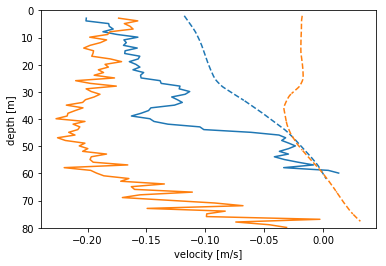

In [991]:
# the section is nearly meridional, so to an excellent approximation the across-track velocity is the zonal component
p78 = plt.plot(adcp_78[' u (m/s) mean East velocity '],adcp_78['depth (m)'],label='7-8') # plot adcp component across section
plt.plot(vgeo[:,0],ctdsection.depth,'--',color=p78[0].get_color())

p89 = plt.plot(adcp_89[' u (m/s) mean East velocity '],adcp_89['depth (m)'],label='8-9')
plt.plot(vgeo[:,1],ctdsection.depth,'--',color=p89[0].get_color())

plt.ylim(80,0)
plt.xlabel('velocity [m/s]')
plt.ylabel('depth [m]')

In [992]:
# plt.plot(ctdsection['longitude'].values, ctdsection['latitude'].values,'o')
# but we can calculate the across-track component from the ADCP veocity components
dist, angs = sw.dist(lon=ctdsection['longitude'].values, lat=ctdsection['latitude'].values)
angs

array([-88.97250049, -90.        ])

In [993]:
# simple function to calculate across-track component
uadcp_xtrack = lambda adcp, ang : adcp[' u (m/s) mean East velocity ']*np.sin(ang) + adcp[' v (m/s) mean North velocity']*np.cos(ang)

In [994]:
uadcp_xtrack_78 = uadcp_xtrack(adcp_78,-angs[0]*np.pi/180)
uadcp_xtrack_89 = uadcp_xtrack(adcp_89,-angs[1]*np.pi/180)

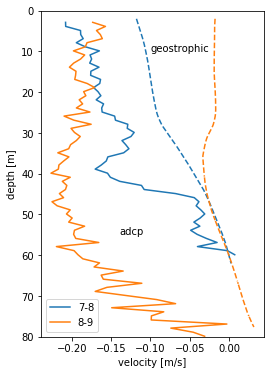

In [995]:
# now replot velocity (as expected, it's the same thing)

plt.figure(figsize=(4,6))

p78 = plt.plot(uadcp_xtrack_78,adcp_78['depth (m)'],label='7-8') # plot adcp component across section
plt.plot(vgeo[:,0],ctdsection.depth,'--',color=p78[0].get_color(),label='7-8')

p89 = plt.plot(uadcp_xtrack_89,adcp_89['depth (m)'],label='8-9')
plt.plot(vgeo[:,1],ctdsection.depth,'--',color=p89[0].get_color(), label='8-9')

plt.ylim(80,0)
plt.xlabel('velocity [m/s]')
plt.ylabel('depth [m]')

plt.annotate('geostrophic',(-0.0995,10))

plt.annotate('adcp',(-0.14,55))

plt.legend(handles=[p78[0],p89[0]])